<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 7 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 10 March 2022</div>

# Classical Statistical Analysis: The T-test

I recently heard of a new python library that does the mcmc simulations *automatically*! It's called `best`.

In [1]:
%matplotlib inline

# basic datascience/data manipulation libraries
import numpy as np
import pandas as pd
import numpy.random as npr
import scipy.stats as stats

# graphs
import seaborn as sns
import matplotlib.pyplot as plt

# formulat interface to statsmodels (standard linear models)
import statsmodels.formula.api as smf

# hate these things
import warnings
warnings.filterwarnings("ignore")

d:\Anaconda3.5.1\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Example

We'll use a fictitious but famous example from [Kruschke (2012)](http://www.indiana.edu/~kruschke/articles/KruschkeAJ2012.pdf) concerning the evaluation of a clinical trial for drug evaluation. 

The trial aims to evaluate the efficacy of a "smart drug" that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment (`drug`) and control (`placebo`) arms, respectively, and these are their post-trial IQs. An IQ between 90 and 110 is considered average; over 120, superior. Let's look at the histograms of our data, ***first thing you should always do***.

Note that although our IQ data is integer type, our datasets here could easily be real-valued, and so we consider our random variable to be **continuous**.

Please plot histograms using `pd.concat([drug, placebo], ignore_index=True)`, and then `.hist('iq', by='group')` on the pandas dataframe, using:
```(python)
trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group')
```

<div style="display:none;">
trial_data.hist('iq', by='group')
</div>

In [2]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012318C64898>,
      dtype=object)

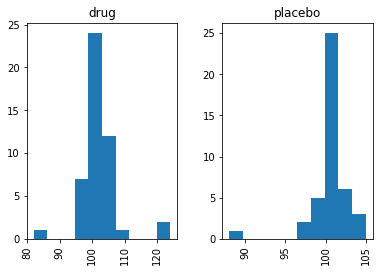

In [3]:
trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group')

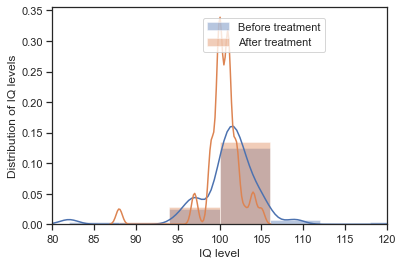

In [4]:
# Let's visualize the data
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

bins = np.arange(70,150,6)

A = drug.iq.values
B = placebo.iq.values

# Show the results of a linear regression within each dataset
ax1 = sns.distplot(A,bins=bins,label='Before treatment')
ax2 = sns.distplot(B,bins=bins,label='After treatment')

plt.pyplot.xlabel('IQ level')
plt.pyplot.ylabel('Distribution of IQ levels')
plt.pyplot.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)

plt.pyplot.xlim((80,120))
plt.pyplot.show()

Can you conclude? A bit tough, right?

In [5]:
# packing the data into a tidy dataframe can be nice
exp_df = pd.DataFrame(dict(group=[0]*len(drug.iq)+[1]*len(placebo.iq), score=np.r_[drug.iq,placebo.iq]))

exp_df.head()

,group,score
0,0,101
1,0,100
2,0,102
3,0,104
4,0,102


Can you conclude? A bit tough, right?

In [6]:
import scipy.stats as stats
combined_iq = np.concatenate((drug.iq, placebo.iq))
print(len(drug.iq))
print(len(placebo.iq))
print( drug.iq.mean() )
print( placebo.iq.mean() )
print( combined_iq.mean() )
stats.ttest_ind(a= drug.iq,
                b= placebo.iq,
                equal_var=False) 

47
42
101.91489361702128
100.35714285714286
101.17977528089888


Ttest_indResult(statistic=1.622190457290228, pvalue=0.10975381983712831)

The results show that the t-value for the mean difference is 1.622. The p-value is 0.11 which is greater than the traditional "alpha" cut off at p=0.05. Therefore this test is *not significant*: The null hypothesis is in effect.

The test yields a p-value of 0.11 means ***there is a 11% chance we'd see sample data this far apart statistically if the two groups tested are actually identical***. 

If we were using a 95% confidence level, we would **fail** to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 0.05. And so we conclude that the drug is as effective as placebo at a 95% confidence level: there is nothing interesting going on. At a significance level of 0.05, our drug outcome on IQ is statistically **nonsignificant**.

Is the mean of the drug group different than the mean of the placebo group?

In [7]:
print("Mean of drug group:", drug.iq.mean())
print("Mean of placebo group:", placebo.iq.mean())
print("The difference in means is: ", drug.iq.mean()-placebo.iq.mean())

Mean of drug group: 101.91489361702128
Mean of placebo group: 100.35714285714286
The difference in means is:  1.5577507598784166


The best way to evaluate differences between groups it do dump the hypothesis testing framework all together and use Bayesian estimation of the differences between groups. Kruschke (2013) describes a simplified/standardize work flow called the BEST test (Bayesian ESTimation) although I've also heard it call the Bayesian Estimation Superceeds the T-test!.

[BEST](https://best.readthedocs.io/en/latest/) is a simplified python package that implements this test for you!
```
pip install best
```

In [8]:
import best
est_out = best.analyze_two(drug.iq, placebo.iq, tune = 2000, cores = 1)

INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '66700')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\Dino\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.6.9-64\lock_dir
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Group 2 log sigma, Group 1 log sigma, nu - 2.5, Group 2 mean, Group 1 mean]
Sampling chain 1, 0 divergences: 100%|██████████| 4000/4000 [00:08<00:00, 463.29it/s]


 to find the probability that the first group’s mean is larger by at least 0.5 than the other’s:

In [9]:
est_out.posterior_prob('Difference of means', low=0.5)

0.854

In [10]:
est_out.model

BestModelTwo(y1=array([101, 100, 102, 104, 102,  97, 105, 105,  98, 101, 100, 123, 105,
       103, 100,  95, 102, 106, 109, 102,  82, 102, 100, 102, 102, 101,
       102, 102, 103, 103,  97,  97, 103, 101,  97, 104,  96, 103, 124,
       101, 101, 100, 101, 101, 104, 100, 101], dtype=int64), y2=array([ 99, 101, 100, 101, 102, 100,  97, 101, 104, 101, 102, 102, 100,
       105,  88, 101, 100, 104, 100, 100, 100, 101, 102, 103,  97, 101,
       101, 100, 101,  99, 101, 100, 100, 101, 100,  99, 101, 100, 102,
        99, 100,  99], dtype=int64), version='v2')

In [11]:
est_out.trace

<MultiTrace: 2 chains, 2000 iterations, 16 variables>

The 95% highest posterior density interval (HDI) can be queried for:

In [12]:
est_out.hdi('Difference of means', 0.95)

(0.10768681032197946, 1.975313033252874)

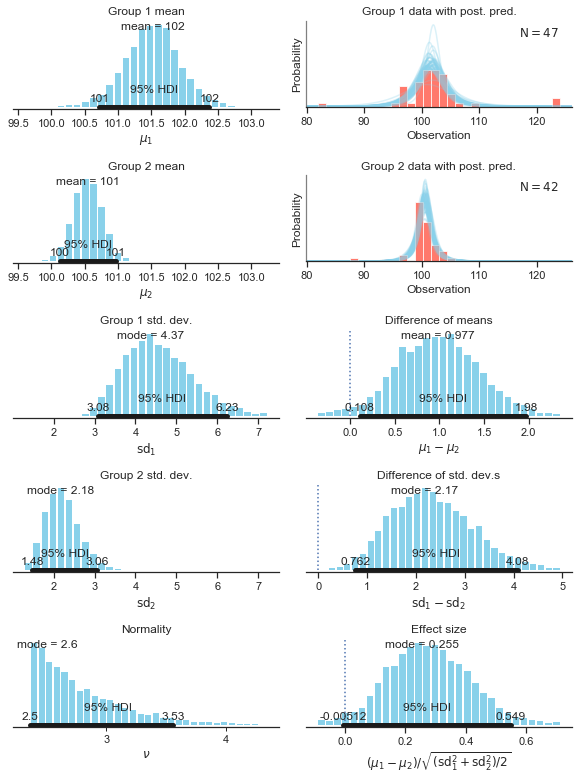

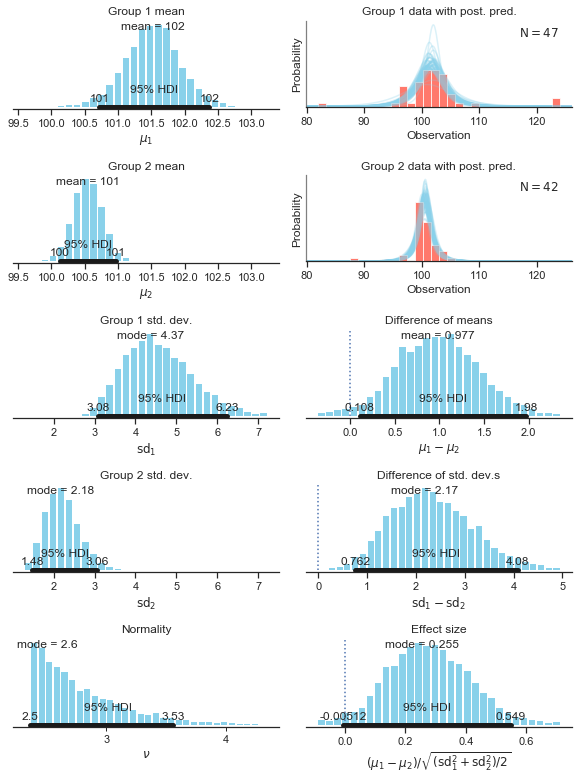

In [13]:
best.plot_all(est_out)

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w

numpy      1.17.3
seaborn    0.9.0
matplotlib 3.1.1
pandas     1.1.5
last updated: Sun Mar 06 2022 

CPython 3.6.9
IPython 7.9.0
watermark 2.0.2
